# Modeling

## Installing Libraries

In [1]:
!python -m pip install --upgrade pip --user
!python -m pip install --upgrade statsmodels --user
!python -m pip install --upgrade sklearn --user
!python -m pip install --upgrade pmdarima --user

     |████████████████████████████████| 1.7MB 28.1MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 23.5 MB/s            
     |████████████████████████████████| 38.2 MB 112 kB/s             ��████▍                      | 11.2 MB 75.6 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 111.6 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 23.2 MB 37.4 MB/s            
     |████████████████████████████████| 306 kB 88.5 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=97287569c06007fc58385f3c0a9fd205b41c9fa63b4a45eb8c4c04237687cd7d
  Stored in directory: /home/labuser/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
     |████████████████████████████████| 1.4 MB 28.5 MB/s            
     |████████████████████████████████| 2.0 MB 91.2 MB/s            
  Consider adding this directory to PATH or, if you

## Loading Dataset & Plotting

ORDERDATE
2017-09-02    20220
2017-09-03    23640
2017-09-04    17604
2017-09-05    18624
2017-09-06     8184
Name: TOTALPRICE, dtype: int64


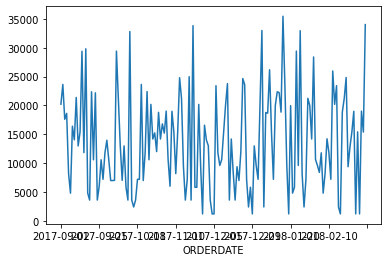

In [2]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

series = read_csv('df_salestop1.csv', header=0, index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

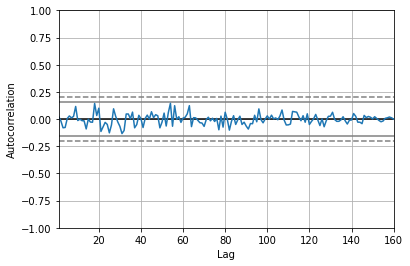

In [3]:
autocorrelation_plot(series)
pyplot.show()

## Fit ARIMA Model

                               SARIMAX Results                                
Dep. Variable:             TOTALPRICE   No. Observations:                  160
Model:                 ARIMA(1, 4, 0)   Log Likelihood               -1878.560
Date:                Wed, 24 Nov 2021   AIC                           3761.120
Time:                        14:52:19   BIC                           3767.220
Sample:                    09-02-2017   HQIC                          3763.598
                         - 03-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8032      0.045    -17.947      0.000      -0.891      -0.715
sigma2      1.693e+09    1.4e-13   1.21e+22      0.000    1.69e+09    1.69e+09
Ljung-Box (L1) (Q):                  46.69   Jarque-

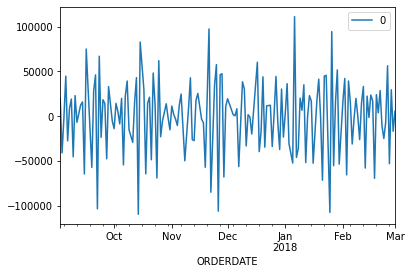

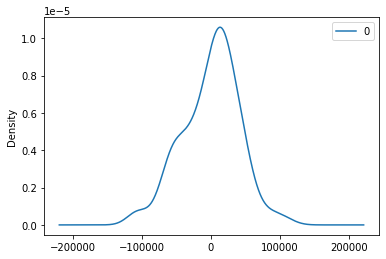

                   0
count     160.000000
mean        4.525261
std     40998.673825
min   -109571.857442
25%    -26438.336578
50%      5489.226247
75%     24223.630652
max    111177.472396


In [4]:
# fit an ARIMA model and plot residual errors
from datetime import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
series = read_csv('df_salestop1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('D')
# fit model
model = ARIMA(series, order=(1,4,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

## Evaluate ARIMA Model

predicted=63625.040390, expected=32988.000000
predicted=54067.417202, expected=2400.000000
predicted=-93157.436620, expected=18768.000000
predicted=67137.434301, expected=18660.000000
predicted=61800.135800, expected=26184.000000
predicted=-3528.276090, expected=15384.000000
predicted=-423.932776, expected=7200.000000
predicted=-14252.642966, expected=20004.000000
predicted=74175.855318, expected=22368.000000
predicted=21787.500059, expected=22224.000000
predicted=-3261.418251, expected=18840.000000
predicted=18240.487322, expected=35460.000000
predicted=76623.254232, expected=23568.000000
predicted=-9179.459729, expected=9600.000000
predicted=-38886.513317, expected=1200.000000
predicted=20659.474057, expected=19968.000000
predicted=76626.326031, expected=4800.000000
predicted=-40778.290237, expected=5820.000000
predicted=-14625.007883, expected=29424.000000
predicted=116098.521277, expected=9600.000000
predicted=-63869.887210, expected=32952.000000
predicted=66426.791575, expected=81

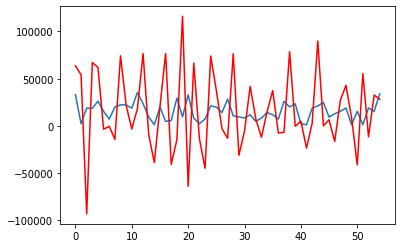

In [5]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('df_salestop1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('D')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,4,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Auto Arima Forecast

In [6]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
series = pd.read_csv('df_salestop1.csv', names=['TOTALPRICE'], header = 0)
series

TOTALPRICE
2017-09-02       20220
2017-09-03       23640
2017-09-04       17604
2017-09-05       18624
2017-09-06        8184
...                ...
2018-02-25       15420
2018-02-26        1200
2018-02-27       19020
2018-02-28       15384
2018-03-01       34008

[160 rows x 1 columns]

In [8]:
model_autoarima = pm.auto_arima(series.TOTALPRICE, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoarima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3554.882, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3433.358, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3503.069, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3407.884, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3400.250, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3395.902, Time=0.60 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3389.173, Time=1.10 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=3384.894, Time=3.10 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=inf, Time=15.60 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=3366.616, Time=4.80 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=2.90 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=7.20 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=3.40 sec
 ARIMA(6,0,2)(0,0,0)[0]             : AIC=inf, Time=13.30

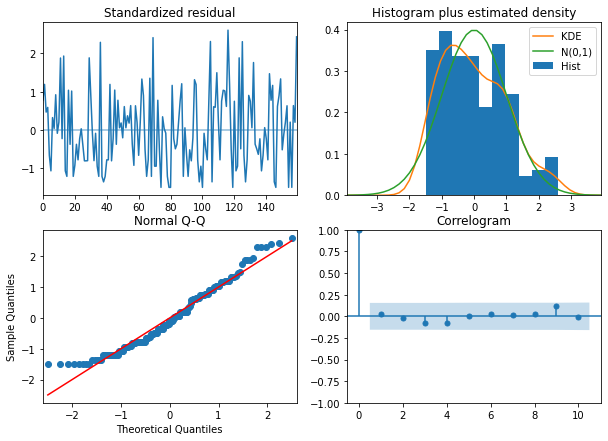

In [9]:
model_autoarima.plot_diagnostics(figsize=(10,7))
plt.show()